<a href="https://colab.research.google.com/github/dctec/mlc/blob/master/week2/StockPrediction/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IF RUNNING IN GOOGLE COLAB {

## HOUSEKEEPING FIRST

In [ ]:
# Mount Google Drive to /content/drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
# If project directory does not exist. Run this first (one time only)
%mkdir -p "/content/drive/My Drive/mlc/week2"
%cd "/content/drive/My Drive/mlc/week2"
%mkdir "sample_data"

In [ ]:
# Once the project and sample data directory exist. Change directory
%cd "/content/drive/My Drive/mlc/week2"
%pwd

# } END IF

# IF RUNNING LOCAL WITH ANACONDA {

## Make sure libraries are installed

In [39]:
!conda install -c defaults pandas-datareader seaborn scikit-learn numpy

Solving environment: done

# All requested packages already installed.



# } END IF

# BEGIN

In [1]:
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


**Step 1** 
- Go to Yahoo Finance and find a stock price that you want to predict. Click on historical data, then download the CSV of that stocks price history https://finance.yahoo.com/quote/AAPL/history?p=AAPL  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import pandas_datareader.data as web
from pandas import Series, DataFrame
#to plot within notebook
%matplotlib inline

In [11]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 9, 1)

df = web.DataReader("IBM", 'yahoo', start, end)
df.tail()
df.to_csv('sample_data/IBM_index.csv',index=True)

In [12]:
df = pd.read_csv('sample_data/IBM_index.csv')
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
414,2019-08-26,131.300003,129.160004,131.050003,129.990005,2833900.0,129.990005
415,2019-08-27,131.699997,130.309998,131.199997,131.169998,4728000.0,131.169998
416,2019-08-28,132.889999,130.039993,130.440002,132.759995,2713600.0,132.759995
417,2019-08-29,135.690002,134.039993,134.179993,134.880005,2971800.0,134.880005
418,2019-08-30,136.070007,134.360001,135.580002,135.529999,2960600.0,135.529999


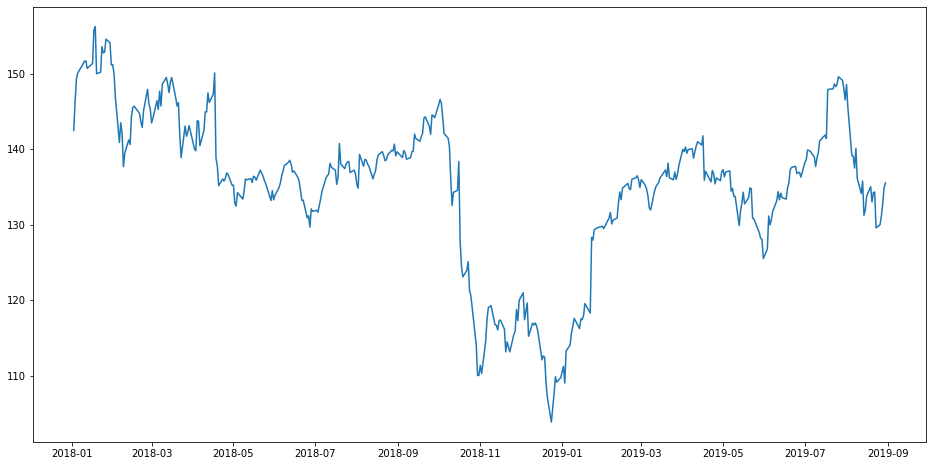

In [16]:
#setting figure size
from matplotlib.pylab import rcParams
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#warnings.warn(msg, FutureWarning)
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], label='Adjusted Close Value history')

In [5]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [17]:
df.shape

(419, 7)

In [19]:
len(df)

419

In [24]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Adj Close'])
for i in range(0,len(df)):
     new_data['Date'][i] = df['Date'][i]
     new_data['Adj Close'][i] = df['Adj Close'][i]


In [29]:
train = new_data[:350]
valid = new_data[350:]

In [30]:
train.shape

(350, 2)

In [31]:
valid.shape

(69, 2)

# Moving Average

In [ ]:


preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-348+i:].sum() + sum(preds)
    b = a/348
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

/Users/tecnico/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tecnico/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


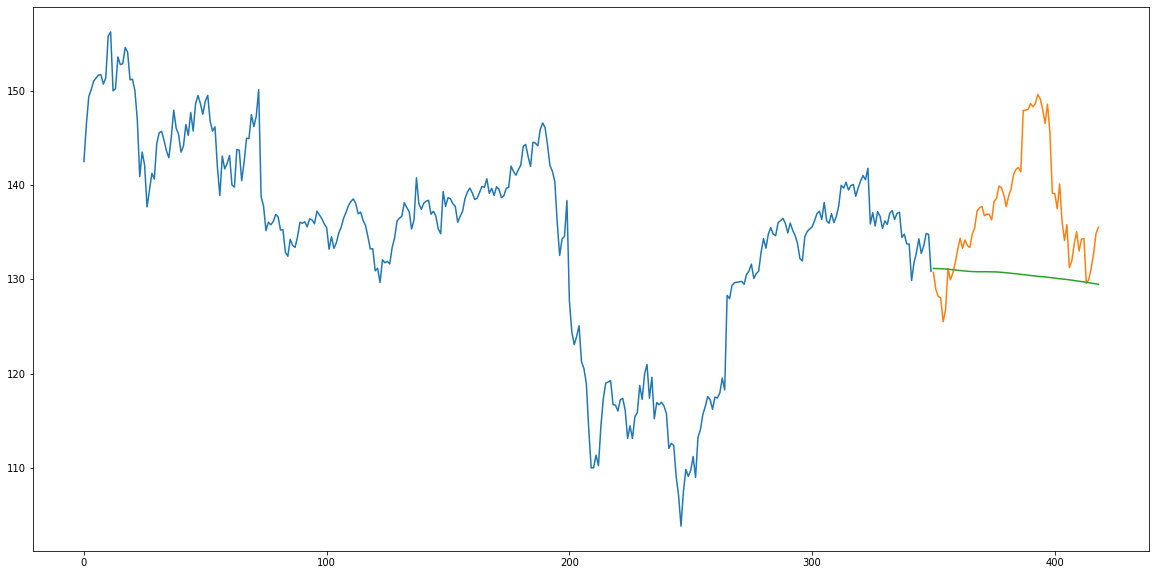

In [34]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])

# Linear Regression

In [36]:
from fastai.structured import add_datepart

ModuleNotFoundError: No module named 'fastai'

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Adj Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Adj Close'][i] = data['Adj Close'][i]
    
#create features
from fastai.structured import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
